# Time Series Components

Observations of a variable $Y$ that become available over time are called *time series data*.
- Time series data are typically related to its own lags (autocorrelated).
- This dependence produces patterns of variability that can be used to forecast future values.
- Properly constructed time series forecasts help eliminate some of the uncertainty associated with the future. 
- A lack of future planning in the recent VUCA business environment could be disasterous.

## Decomposition of Time Series Data

One approach to the analysis of time series data is to identify the component factors that affect each of the values in a series. This identification procedure is called *decomposition*.

Two simplest models that decompose a time series ($Y_t$) into components are:
\begin{equation}
\text{Additive model} \quad Y_t = T_t + S_t + I_t
\end{equation}
or 
\begin{equation}
\text{Multiplicative model} \quad Y_t = T_t \times S_t \times I_t
\end{equation}

Typical four components in a time series
- Trend component ($T_t$): represents the underlying growth in a time series.
- Cyclical component ($C_t$): represents the changes of economic conditions.
- Seasonal component ($S_t$): represents seasonal variation typically found in quarterly, monthly, or weekly data. 
- Irregular component ($I_t$): consists of unpredictable or random fluctuations.

*Note 1: In practice, cycles are often difficult to identify and are frequently regarded as part of the trend.*

*Note 2: The multiplicative model can transform into additive model by taking logs.*

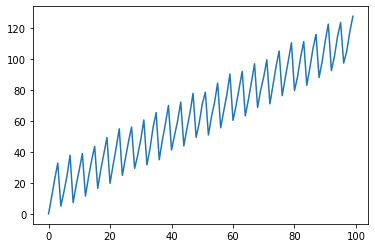

In [3]:
import numpy as np
import matplotlib.pyplot as plt

tlength = 100
T = np.array([x for x in range(tlength)])
s = [0,1,2,3]
S = np.array(s*25)
I = np.random.randn(tlength)
Y_add = T + S*10 + I

plt.plot(Y_add)
plt.show()


<AxesSubplot:xlabel='DATE'>

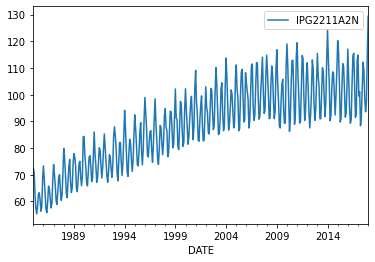

In [2]:
import pandas as pd

# importing dataset
data = pd.read_csv(r'/Users/dkoh/Dropbox/teaching/ECON4753_FA2022/data/Electric_Production.csv')
 
# casting Month column to datetime object
data['DATE'] = pd.to_datetime(data['DATE'])
 
# Setting Month as index
data = data.set_index('DATE')
 
# Creating the plot
data.plot()

- The additive model works best when the time series being analyzed has roughly the same variability through the length of the series.
- The multiplicative model works best when the variability of the time series increases with the level.

## Trend

- Trends are long-term moverments in a time series that can sometimes be described by a straight line or a smooth curve.
- Examples are:
  - population change
  - price change
  - technological change
  - productivity increases
  - product life cycles.
- If the trend appears to be roughly linear, then it is represented by the equation
\begin{equation}
\hat{T}_t = b_0 + b_1 t
\end{equation}
where $\hat{T}$ is the predicted value for the trend at time $t$, the symbol $t$ represents time, the slope coefficient $b_1$ is the average increasae or decrease in $T$ foreach one-period increase in time.
- <font color='red'>How can we find the right $b_0$ and $b_1$?</font>
  - Time trend can be fit to the data using the *method of least square* that selects the values of the coefficients, $b_0$ and $b_1$, so that the estimated trend values $\hat{T}_t$ minimizes the sum of square errors:
\begin{equation}
SSE = \sum (Y_t - \hat{T_t})^2 = \sum (Y_t - b_0 - b_1 t)^2
\end{equation}

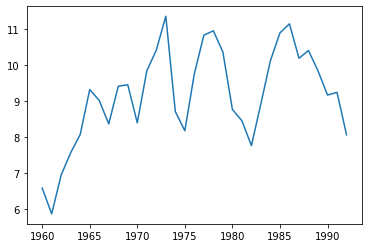

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pcar = pd.read_csv('https://raw.githubusercontent.com/dongyakoh/business_forecasting/main/data/passenger_cars.csv')
pcar.columns = 'year','registration'
pcar.set_index('year',inplace=True)
plt.plot(pcar['registration'])
plt.show()

Estimated linear trend:
T_t = 7.988+0.069t


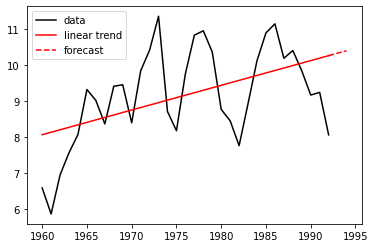

In [23]:
first_year, last_year = pcar.index[0], pcar.index[-1]
yearlist = np.arange(first_year,last_year+3,1)  # Add two more years for forecast (1960-1992, 1993, 1994)
pcar_new = pcar.reindex(yearlist,copy=True)  # Re-index so that we have rows for additional years
pcar_new['t'] = [x+1 for x in range(len(pcar_new))]  # time trend with two additional periods for forecast
data_len = len(pcar)

# Estimate linear trend
coef = np.polyfit(x=pcar_new.t[:data_len], y=pcar_new.registration[:data_len], deg=1)
print("Estimated linear trend:")
print("T_t = "+"%.3f"% coef[1]+"+"+"%.3f"% coef[0]+"t")
model = np.poly1d(coef)
pcar_new['trend'] = model(pcar_new.t)
pcar_new['e_trend'] = pcar_new.registration - pcar_new.trend
pcar_new
plt.plot(pcar_new.registration[:data_len],'k-',label='data')
plt.plot(pcar_new.trend[:data_len], color='red',label='linear trend')
plt.plot(pcar_new.trend[data_len-1:], color='red',linestyle='dashed',label='forecast')
plt.legend()
plt.show()
# pcar.head()

### Additional Trend Curves

- A linear trend is occasionally observed in aggregate economic indicator (e.g., GDP, personal consumption, or investment), not so common in firm/individual data. 
- For example, the life cycle of a new product has three stages: introduction, growth, and maturity and saturation. Most commonly observed life cycle is an S-shape pattern.
- In this case, a straight-line trend would not work to capture the S-shape trend of a new product.
- A simple modification to incorporate a curvature is a quadratic trend.

\begin{equation}
\hat{T}_t = b_0 + b_1 t + b_2 t^2 
\end{equation}


Estimated quadratic trend:
T_t = 6.356+0.348t-0.008t^2


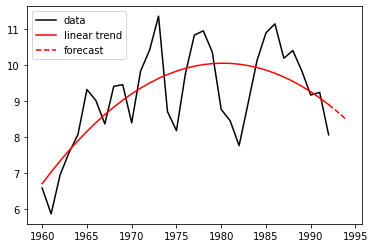

In [24]:
# Estimate a quadratic trend
coef2 = np.polyfit(x=pcar_new.t[:data_len], y=pcar_new.registration[:data_len], deg=2)
print("Estimated quadratic trend:")
print("T_t = "+"%.3f"% coef2[2]+"+"+"%.3f"% coef2[1]+"t"+"%.3f"% coef2[0]+"t^2")

model2 = np.poly1d(coef2)
pcar_new['qtrend'] = model2(pcar_new.t)
pcar_new['e_qtrend'] = pcar_new.registration - pcar_new.qtrend
plt.plot(pcar_new.registration[:data_len],'k-',label='data')
plt.plot(pcar_new.qtrend[:data_len], color='red',label='linear trend')
plt.plot(pcar_new.qtrend[data_len-1:], color='red',linestyle='dashed',label='forecast')
plt.legend()
plt.show()

<font color='red'>Note: Sometimes, polynomial equations are very flexible to approximate any trendlines of data. The linear trend and the quadratic trend above are indeed a polynomial of order 1 and 2, respectively. For your exercise, try a polynomial of order 3 and check how the trendline looks.</font>

\begin{equation}
\hat{T}_t = b_0 + b_1 t + b_2 t^2 + b_3 t^3 
\end{equation}

### Forecasting Trend

- Suppose we are current at time t=n (end of data series) and we want to use a polynomial trend model to forecast the value of $Y_t$, $p$ step ahead.
- The time period at which we make the forecast, $n$, is called the *forecast origin*.
- The value $p$ is called the *lead time*.
- For the linear trend model, we can produce a forecast by evaluating $\hat{T}_{n+p} = \hat{b}_0 + \hat{b}_1 (n+p)$, using the estimated coefficient $\hat{b}_0, \hat{b}_1$.

<font color='red'>$\rightarrow$ You can find the two-period ($p=$2) forecasts of two trendlines in the graphs above.</font>

### Seasonality

- A seasonal pattern is one that repeats itself year after year.
- Seasonal patterns are often found in weekly, monthly, or quarterly data.
- To identify the seasonality in time series, 
  1. The trend is determined directly from the original data
  2. Smooth out the irregular component from the detrended data
  3. This leaves data containing only seasonal variation

### Python Packages for Decomposition

- Python develpers have already created and shared many good packages for time series decomposition.
- In this example, I will use the one in the ```statsmodels``` package.
- Caveat: Before you use any built-in functions, you must check what method the function uses.
- ```seasonal_decompose``` function first estimates the trend by applying moving averages to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.

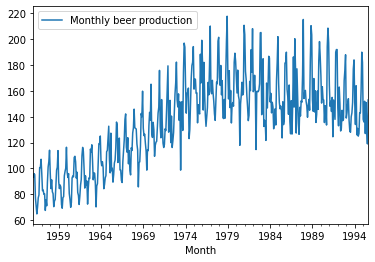

In [15]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# importing dataset
data = pd.read_csv(
    r'/Users/dkoh/Dropbox/teaching/ECON4753_FA2022/data/monthly-beer-production-in-austr.csv')
  
# casting Month column to datetime object
data['Month'] = pd.to_datetime(data['Month'])
 
# Setting Month as index
data = data.set_index('Month')
data.plot()
plt.show()

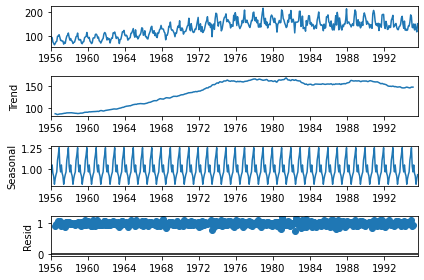

In [17]:
# Create a copy of the data series for analysis
analysis = data[['Monthly beer production']].copy()

# Decompose the beer production based on an additive decomposition model
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

# Take out each component
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

# Or plot all separately
decompose_result_mult.plot();

### Seasonally Adjusted Data

- Once the seasonal component has been isolated, it can be used to calculate *seasonally adjusted data*.
- For an additive decomposition,
\begin{equation}
Y_t - S_t = T_t + I_t
\end{equation}
- For a multiplicative decomposition,
\begin{equation}
\frac{Y_t}{S_t} = T_t \times I_t
\end{equation}
- Most economic series published by government agencies are seasonally adjusted because seasonal variation is not of primary interest.
- Several reasons to prefer seasonally adjusted data over non-adjusted data for data analysis
  1. Seasonal adjustment allows reliable comparison of values at different points in time.
  1. It is easier to understand the relationship among economic or business variables once the complicating factor of seasonality has been removed from the data.
  1. Seasonal adjustment may be a useful element in the production of short-term forecasts of future values of a time series.

### Cyclical and Irregular Variations

- Cycles are long-run, wavelike fluctuations that occur most frequently in macro indicators of economic activity.
- Usually, trend and cycles cannot be separately identified from the data.
- However, some insight into the cyclical behavior of a time series can be obtained by eliminating the trend and seasonal components:

\begin{equation}
\frac{Y_t}{T_t \times S_t} = \frac{T_t \times C_t \times S_t \times I_t}{T_t \times S_t} = C_t \times I_t
\end{equation}

- A moving average of $C_t \times I_t$ can be used to identify the cyclical component and separate from the irregular components:

\begin{equation}
I_t = \frac{C_t \times I_t}{C_t}
\end{equation}

- The irregular component represents the variability in the time series after the other components have been removed. It is sometimes called the *residual* or *error*.